In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
def load_trials_dict(result_dict_location):
    if os.path.exists(result_dict_location):
        with open(result_dict_location, 'r') as f:
            data = json.load(f)
            return data
    return None

In [3]:
# DATA_PATH_TO_PLOT = 'TrialResults/trial_results.json'
# DATA_PATH_TO_PLOT = "TrialResults/trial_results_first_128.json"
DATA_PATH_TO_PLOT = "TrialResults/trial_results_first_512.json"
# DATA_PATH_TO_PLOT = 'TrialResults/trial_results_mid_512.json'

In [4]:
data = load_trials_dict(DATA_PATH_TO_PLOT)

In [5]:
data.keys()

dict_keys(['0.0_first', '0.5_first', '0.1_first', '0.2_first', '0.3_first', '0.4_first'])

In [6]:
num_neurons = os.path.splitext(os.path.basename(DATA_PATH_TO_PLOT))[0].split('_')[-1]


In [7]:
# data[list(data.keys())[0]]

In [8]:
std_dict = {}
for model_key in data.keys():
    for dropout_key, scores in data[model_key].items():
        if std_dict.get(model_key) is None:
            std_dict[model_key] = {}
        scores = np.array(scores)
        std_dict[model_key][dropout_key] = round(scores.std(), 6)
        data[model_key][dropout_key] = round(scores.mean(), 6)
        # print(np.round(np.sqrt(np.mean(np.power(arr - arr.mean(), 2))), 5), np.round(arr.std(), 5))

In [9]:
def get_data_as_tuples(primary_key):
    train_rate_acc, test_rate_acc = [], []
    for key in data[primary_key].keys():
        rate = round(float(key.split("_")[0]), 1)
        acc = data[primary_key][key]
        std = std_dict[primary_key][key]
        if "train" in key:
            train_rate_acc.append((rate, acc, std))  # (dropout_rate, accuracy-20-epochs)
        elif "test" in key:
            test_rate_acc.append((rate, acc, std))
    return train_rate_acc, test_rate_acc

In [10]:
train_rate_acc, test_rate_acc = get_data_as_tuples(list(data.keys())[0])

In [11]:
train_rate_acc

[(0.0, 0.97801, 0.000871),
 (0.1, 0.977438, 0.000537),
 (0.2, 0.976822, 0.000924),
 (0.3, 0.979657, 0.001907),
 (0.4, 0.98154, 0.000538),
 (0.5, 0.977364, 0.005165),
 (0.6, 0.963935, 0.000776),
 (0.7, 0.959435, 0.000664),
 (0.8, 0.94893, 0.000551),
 (0.9, 0.912191, 0.001883),
 (1.0, 0.1, 0.0)]

In [12]:
test_rate_acc

[(0.0, 0.91081, 0.000286),
 (0.1, 0.909905, 0.00076),
 (0.2, 0.91008, 0.001641),
 (0.3, 0.913525, 0.001514),
 (0.4, 0.913775, 0.001049),
 (0.5, 0.9105, 0.003556),
 (0.6, 0.90195, 0.001619),
 (0.7, 0.89771, 0.001969),
 (0.8, 0.88805, 0.001379),
 (0.9, 0.85946, 0.003199),
 (1.0, 0.1, 0.0)]

In [13]:
def get_unpacked_xy(test_list, train_list):
    test_rate = np.array([tup[0] for tup in test_list])
    test_acc = np.array([tup[1] for tup in test_list])
    test_std = np.array([tup[2] for tup in test_list])
    train_rate = np.array([tup[0] for tup in train_list])
    train_acc = np.array([tup[1] for tup in train_list])
    train_std = np.array([tup[2] for tup in train_list])
    return test_rate, test_acc, test_std, train_rate, train_acc, train_std

In [14]:
def get_num_neruons_str(key):
    if num_neurons == 'results':
        num_neurons_str = '256' if "mid" in key else '512'
    else:
        num_neurons_str = num_neurons
    return num_neurons_str

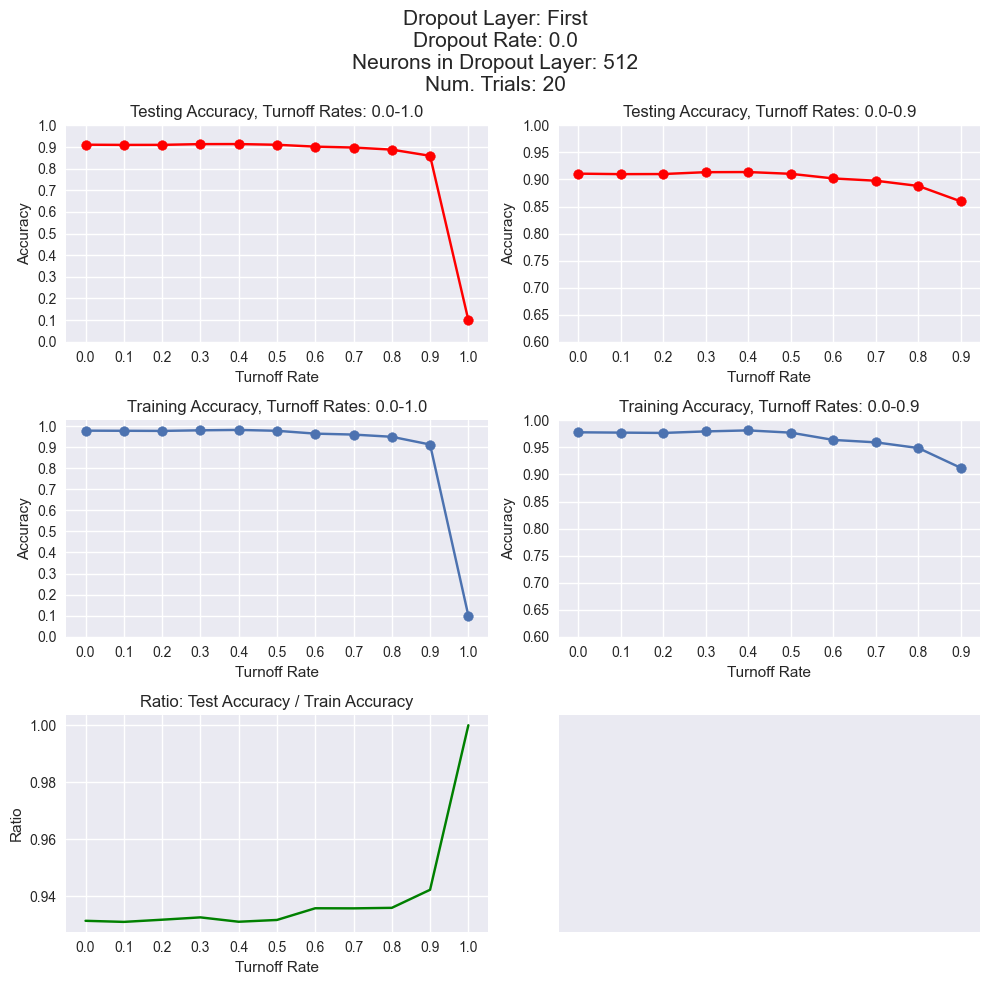

<Figure size 800x550 with 0 Axes>

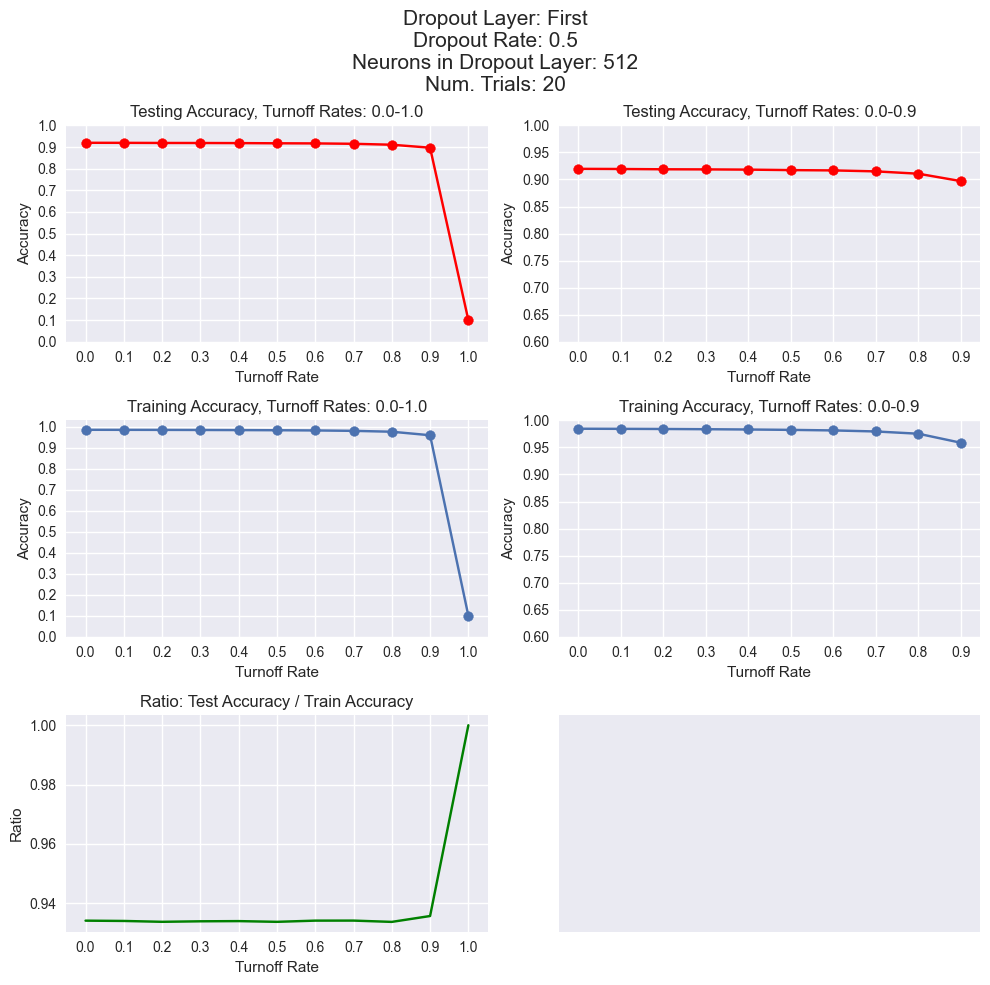

<Figure size 800x550 with 0 Axes>

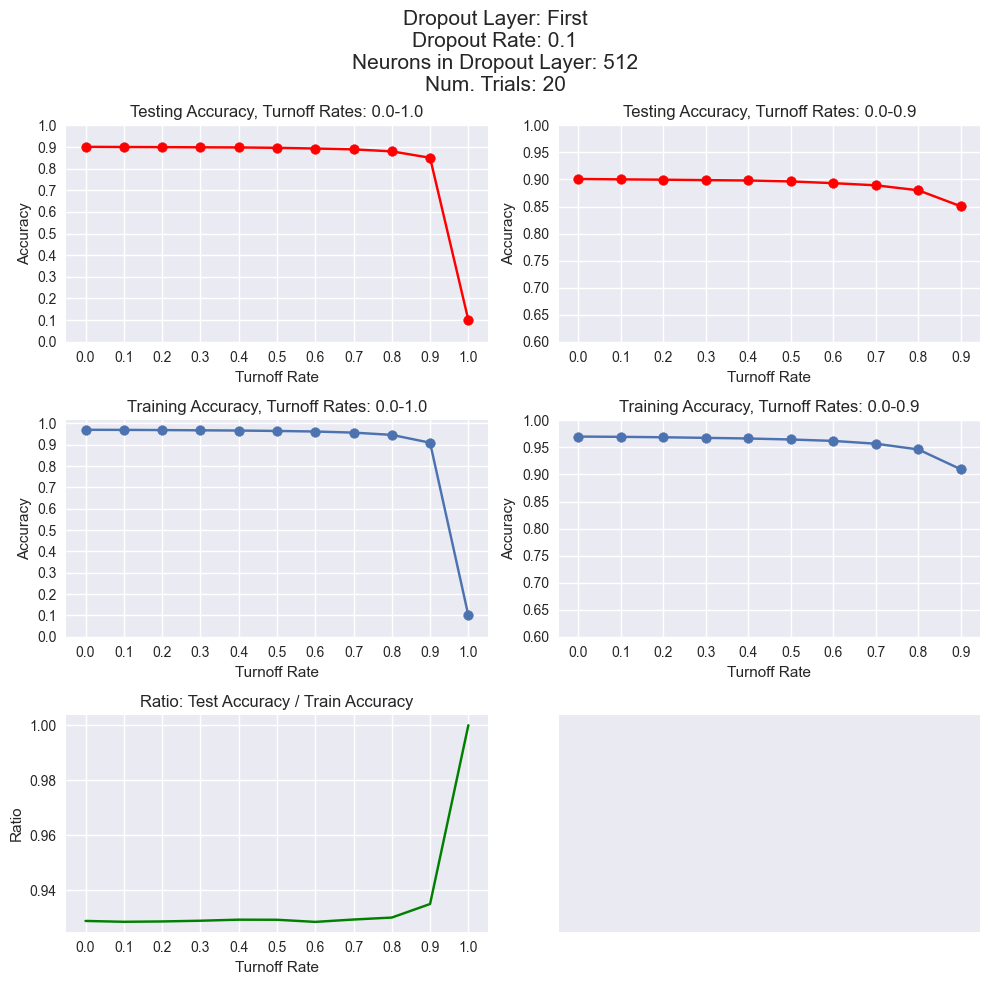

<Figure size 800x550 with 0 Axes>

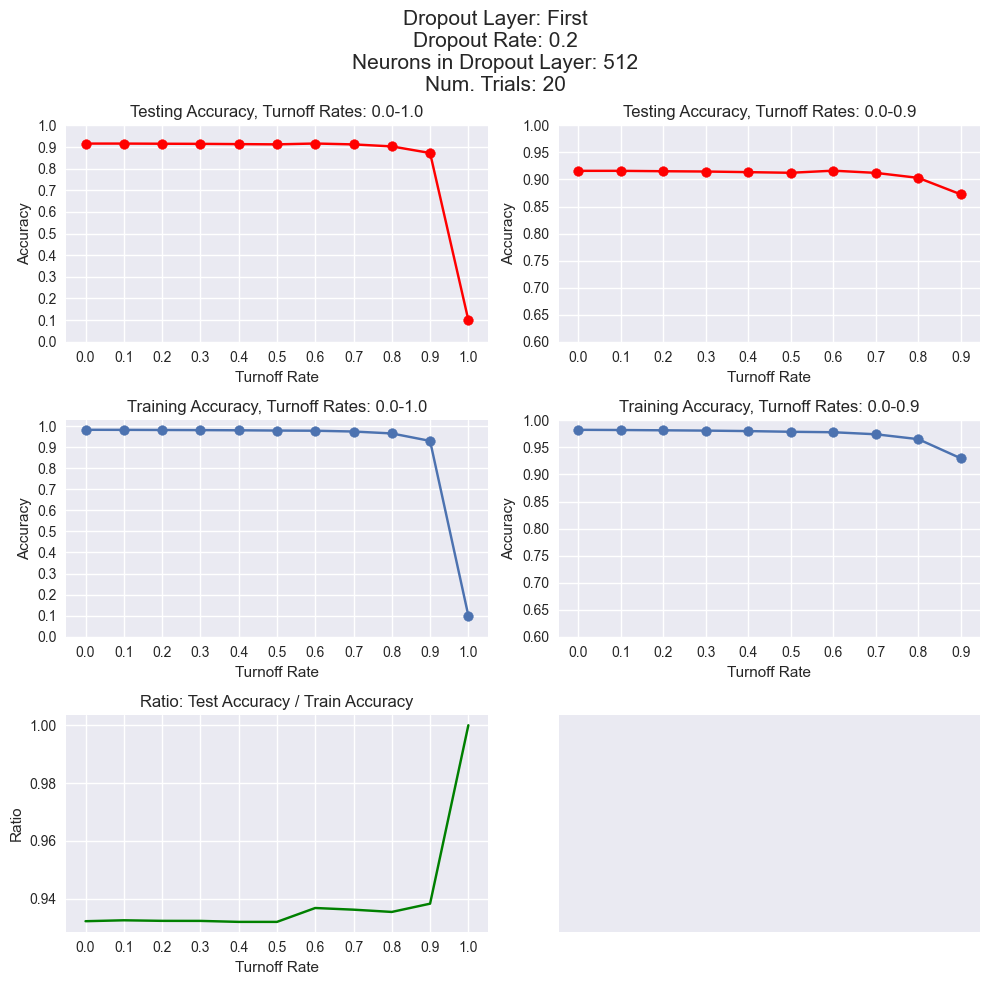

<Figure size 800x550 with 0 Axes>

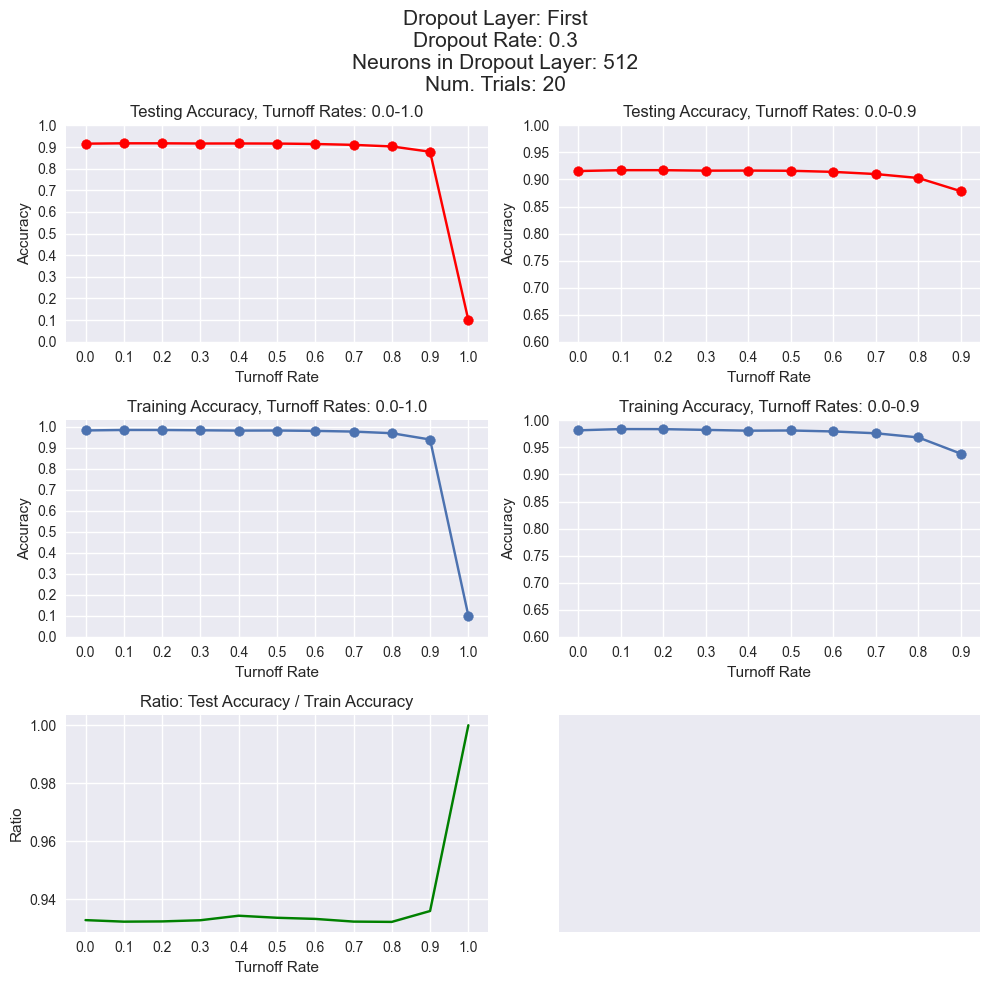

<Figure size 800x550 with 0 Axes>

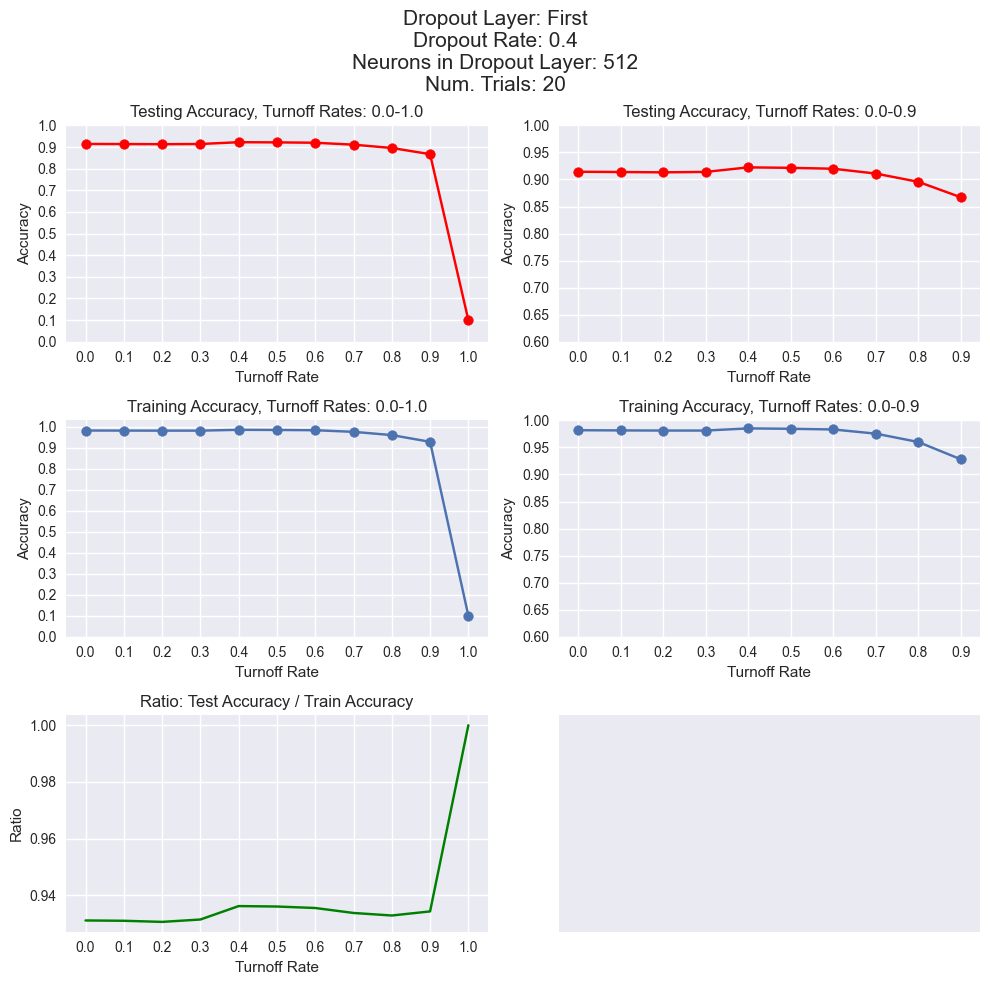

<Figure size 800x550 with 0 Axes>

In [15]:
num_neurons_str = None
for primary_key in data.keys():
    train_rate_acc, test_rate_acc = get_data_as_tuples(primary_key)
    test_rate, test_acc, test_std, train_rate, train_acc, train_std = get_unpacked_xy(test_rate_acc, train_rate_acc)
    num_neurons_str = get_num_neruons_str(primary_key)
    dropout_rate, dropout_layer = primary_key.split('_')

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), layout='tight')
    fig.suptitle(f"Dropout Layer: {dropout_layer[0].upper()}{dropout_layer[1:]}\n"
                 f"Dropout Rate: {dropout_rate}\n"
                 f"Neurons in Dropout Layer: {num_neurons_str}\n"
                 f"Num. Trials: 20", fontsize=15)
    ax[0, 0].scatter(test_rate, test_acc, c='r')
    ax[0, 0].errorbar(test_rate, test_acc, test_std, c='r')
    ax[0, 0].grid(True)
    ax[0, 0].set_xticks(test_rate)
    ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[0, 0].set_title('Testing Accuracy, Turnoff Rates: 0.0-1.0')
    ax[0, 0].set_xlabel('Turnoff Rate')
    ax[0, 0].set_ylabel('Accuracy')

    ax[0, 1].scatter(test_rate[:-1], test_acc[:-1], c='r')
    ax[0, 1].errorbar(test_rate[:-1], test_acc[:-1], yerr=test_std[:-1], c='r')
    ax[0, 1].grid(True)
    ax[0, 1].set_xticks(test_rate[:-1])
    ax[0, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[0, 1].set_title('Testing Accuracy, Turnoff Rates: 0.0-0.9')
    ax[0, 1].set_xlabel('Turnoff Rate')
    ax[0, 1].set_ylabel('Accuracy')

    ax[1, 0].scatter(train_rate, train_acc)
    ax[1, 0].errorbar(train_rate, train_acc, train_std)
    ax[1, 0].set_xticks(train_rate)
    ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[1, 0].grid(True)
    ax[1, 0].set_title("Training Accuracy, Turnoff Rates: 0.0-1.0")
    ax[1, 0].set_xlabel('Turnoff Rate')
    ax[1, 0].set_ylabel('Accuracy')

    ax[1, 1].scatter(train_rate[:-1], train_acc[:-1])
    ax[1, 1].errorbar(train_rate[:-1], train_acc[:-1], train_std[:-1])
    ax[1, 1].set_xticks(train_rate[:-1])
    ax[1, 1].grid(True)
    ax[1, 1].set_title("Training Accuracy, Turnoff Rates: 0.0-0.9")
    ax[1, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[1, 1].set_xlabel('Turnoff Rate')
    ax[1, 1].set_ylabel('Accuracy')

    ratio = test_acc / train_acc
    ax[2, 0].plot(train_rate, ratio, 'g')
    ax[2, 0].set_xticks(train_rate)
    ax[2, 0].grid(True)
    ax[2, 0].set_title("Ratio: Test Accuracy / Train Accuracy")
    ax[2, 0].set_xlabel('Turnoff Rate')
    ax[2, 0].set_ylabel('Ratio')

    ax[2, 1].set_xticks([])
    ax[2, 1].set_yticks([])

    plt.tight_layout()
    plt.show()
    fig.savefig(f"SavedFigs/test/{primary_key}_{num_neurons_str}.png")  # Save the figure as PNG
    plt.clf()  # Clear the entire figure in matplotlib

In [16]:
training_data = {}
testing_data = {}
for primary_key in data.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    training_data[primary_key_new] = {}
    testing_data[primary_key_new] = {}
    for secondary_key, curr_accuracy in data[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        rounded_key = f"{round(float(dropout_rate), 2)} turnoff"
        if round(float(dropout_rate), 2) == 1.0:
            continue
        if 'test' in eval_type:
            testing_data[primary_key_new][rounded_key] = curr_accuracy
        else:
            training_data[primary_key_new][rounded_key] = curr_accuracy

In [17]:
testing_data_std = {}
for primary_key in std_dict.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    testing_data_std[primary_key_new] = []
    for secondary_key, curr_std in std_dict[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        if round(float(dropout_rate), 2) == 1.0:
            continue
        if 'test' in eval_type:
            testing_data_std[primary_key_new].append(curr_std)

In [18]:
train_df = pd.DataFrame(training_data)
train_df = train_df[sorted(train_df.columns)]

In [19]:
test_df = pd.DataFrame(testing_data)
test_df = test_df[sorted(test_df.columns)]

In [20]:
locations = ["first", "middle", "last"]

In [21]:
def create_heatmap_plots(curr_df, model_stage):
    for location in locations:
        heatmap_data = curr_df.filter(like=location)
        heatmap_data = heatmap_data.rename(lambda col_name: col_name.replace(f' {location} dropout', ''),
                                           axis='columns')
        heatmap_data = heatmap_data.rename(lambda row_name: row_name.replace(' turnoff', ''))
        num_neurons_str = get_num_neruons_str(location)
        if len(heatmap_data.transpose()):
            fig = plt.figure()
            sns.heatmap(heatmap_data, annot=True)
            plt.xlabel("Dropout Rate")
            plt.ylabel("Turnoff Rate")
            plt.suptitle(f'Dropout Layer: {location[0].upper()}{location[1:]}\n'
                         f'Neurons in Dropout Layer: {num_neurons_str}\n'
                         f'Accuracy on: {model_stage} Set\n'
                         f'Num. Trials: 20', fontsize=15)
            plt.tight_layout()
            plt.show()  # Display the current heatmap
            fig.savefig(
                f"SavedFigs/heatmaps/{location}_{num_neurons_str}_{model_stage[0].lower()}{model_stage[1:]}_heatmap.png")  # Save the figure as PNG

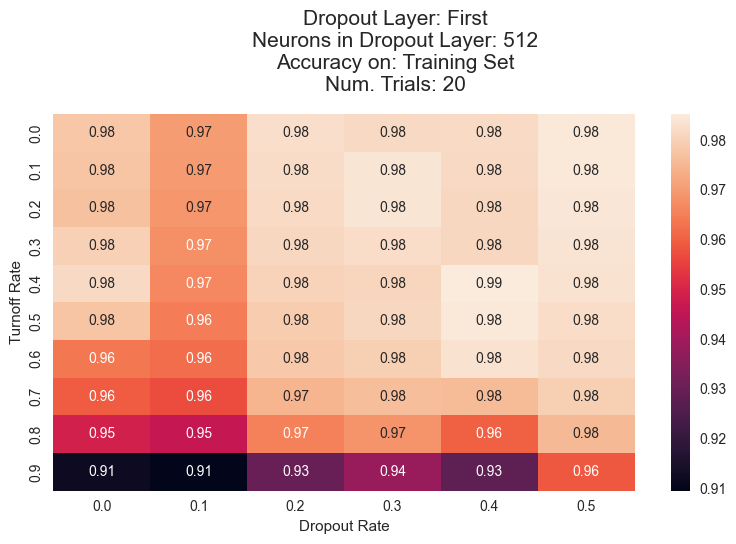

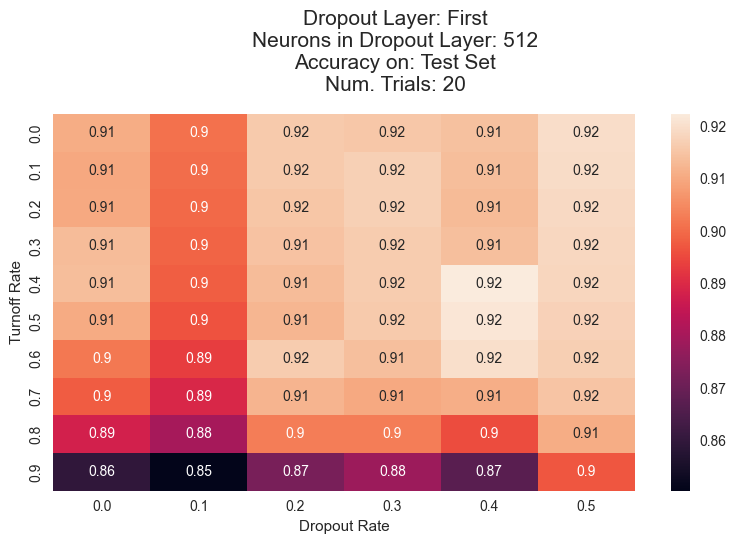

In [22]:
create_heatmap_plots(train_df, "Training")
create_heatmap_plots(test_df, "Test")

[0.000286, 0.00076, 0.001641, 0.001514, 0.001049, 0.003556, 0.001619, 0.001969, 0.001379, 0.003199]
[0.0, 0.000821, 0.000867, 0.000979, 0.001079, 0.001134, 0.001543, 0.001595, 0.001904, 0.002483]
[0.0, 0.000755, 0.00093, 0.000949, 0.001125, 0.00122, 0.001269, 0.001099, 0.001311, 0.00243]
[0.0, 0.000878, 0.000717, 0.001105, 0.001582, 0.000723, 0.001028, 0.001262, 0.001631, 0.002675]
[0.0, 0.000522, 0.000706, 0.002902, 0.000895, 0.001284, 0.00121, 0.006279, 0.001818, 0.002293]
[0.0, 0.000699, 0.00092, 0.000734, 0.000885, 0.001139, 0.000998, 0.00173, 0.00161, 0.001615]


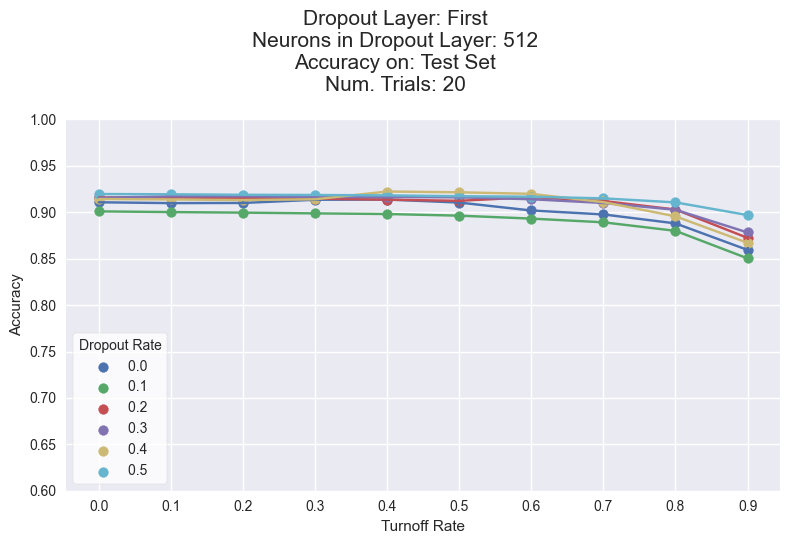

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [23]:
for location in locations:
    legend_labels = []
    turnoff_rates = np.arange(0.0, 1.0, 0.1)
    flag = False
    fig = plt.figure()
    for primary_key in sorted(testing_data.keys()):
        num_neurons_str = get_num_neruons_str(location)
        if location in primary_key:
            flag = True
            acc_lst = []
            legend_labels.append(primary_key.replace(f'{location} dropout', ''))
            for secondary_key, acc_value in testing_data[primary_key].items():
                acc_lst.append(acc_value)
            plt.scatter(turnoff_rates, acc_lst)
            print(testing_data_std[primary_key])
            plt.errorbar(turnoff_rates, acc_lst, yerr=testing_data_std[primary_key])
    if flag:  # only save plot if layer exists
        plt.xticks(turnoff_rates)
        plt.yticks(np.arange(0.6, 1.05, 0.05))
        # plt.yticks(np.arange(0.88, 0.92, 0.01))  # zoomed in y axis for poster plot
        plt.xlabel("Turnoff Rate")
        plt.ylabel("Accuracy")
        plt.legend(legend_labels, title='Dropout Rate', frameon=True, facecolor='white')
        plt.suptitle(f"Dropout Layer: {location[0].upper()}{location[1:]}\n"
                     f"Neurons in Dropout Layer: {num_neurons_str}\n"
                     f"Accuracy on: Test Set\n"
                     f"Num. Trials: 20", fontsize=15)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        fig.savefig(f"SavedFigs/scatterPlots/{location}_{num_neurons_str}_test.png")